Activity 2: Random Vacuum Agent

In [2]:
import random
def RandomVacuumAgent():
  actions = ['Left', 'Right', 'Suck', 'NoOp']
  return random.choice(actions)
for i in range(5): # repeat 5 times
 print("Step", i+1, "->", RandomVacuumAgent())

Step 1 -> NoOp
Step 2 -> Suck
Step 3 -> Suck
Step 4 -> Suck
Step 5 -> Right


Activity 3: Reflex Agent (2 Tiles)

In [3]:
def ReflexVacuumAgent(location, status):
  if status == 'Dirty':
    return 'Suck'
  elif location == 'A':
   return 'Right'
  else:
   return 'Left'
print("Test 1:", ReflexVacuumAgent('A', 'Dirty')) # Expect: Suck
print("Test 2:", ReflexVacuumAgent('A', 'Clean')) # Expect: Right
print("Test 3:", ReflexVacuumAgent('B', 'Clean')) # Expect: Left

Test 1: Suck
Test 2: Right
Test 3: Left


Activity 4: Model-based Agent

In [6]:
def ModelVacuumAgent(model, location, status):
  model[location] = status
  if all(state == 'Clean' for state in model.values()):
   return 'NoOp'
  elif status == 'Dirty':
   return 'Suck'
  elif location == 'A':
   return 'Right'
  else:
   return 'Left'

model = {'A': None, 'B': None}
print("Test 1:", ModelVacuumAgent(model, 'A', 'Dirty')) # Expect: Suck
print("Test 2:", ModelVacuumAgent(model, 'B', 'Dirty')) # Expect: Suck
print("Test 3:", ModelVacuumAgent(model, 'A', 'Clean')) # Expect: Right
print("Test 4:", ModelVacuumAgent(model, 'B', 'Clean')) # Expect: Left
print("Test 5:", ModelVacuumAgent({'A':'Clean','B':'Clean'}, 'A', 'Clean'))

Test 1: Suck
Test 2: Suck
Test 3: Right
Test 4: NoOp
Test 5: NoOp


Activity 5: Goal-based Agent

In [7]:
def GoalBasedVacuumAgent(room, location):
  while 'Dirty' in room.values():
    if room[location] == 'Dirty':
      room[location] = 'Clean'
      print(location, ": Suck")
    location = 'B' if location == 'A' else 'A'
  print("Goal achieved! Room is clean.")
room = {'A': 'Dirty', 'B': 'Clean'}
GoalBasedVacuumAgent(room, 'A')

A : Suck
Goal achieved! Room is clean.


Activity 6: Utility-based Agent

In [8]:
def UtilityBasedAgent(location, status, steps):
  utility = 0
  if status == 'Dirty':
    utility += 10
  else:
   return 'Move', utility - steps
print("Test 1:", UtilityBasedAgent('A', 'Dirty', 3)) # Expect: ('Suck', 7)
print("Test 2:", UtilityBasedAgent('B', 'Clean', 2)) # Expect: ('Move', -2)

Test 1: None
Test 2: ('Move', -2)


Activity 7: Table-driven Agent

In [9]:
def TableDrivenVacuumAgent(percepts):
  table = {
(('A','Clean'),): 'Right', # If at A and Clean -> Move Right
(('A','Dirty'),): 'Suck', # If at A and Dirty -> Suck
(('B','Dirty'),): 'Suck' # If at B and Dirty -> Suck
}

  return table.get(percepts, 'NoOp')
print("Test 1:", TableDrivenVacuumAgent((('A','Dirty'),))) # Expect: Suck
print("Test 2:", TableDrivenVacuumAgent((('A','Clean'),))) # Expect: Right
print("Test 3:", TableDrivenVacuumAgent((('B','Dirty'),))) # Expect: Suck
print("Test 4:", TableDrivenVacuumAgent((('B','Clean'),))) # Expect: NoOp

Test 1: Suck
Test 2: Right
Test 3: Suck
Test 4: NoOp


Activity 8: Vacuum Environment Simulator

In [10]:
room = {'A': 'Dirty', 'B': 'Dirty'}
def run(agent):
  for loc in list(room.keys()):
    action = agent(loc, room[loc])
    print(f"At {loc} -> {action}")
    if action == 'Suck':
     room[loc] = 'Clean'
run(ReflexVacuumAgent)

At A -> Suck
At B -> Suck


Activity 9: Compare Random vs Reflex

In [12]:
import random
def RandomVacuumAgent(location, status):
  actions = ['Left', 'Right', 'Suck', 'NoOp']
  return random.choice(actions)
def ReflexVacuumAgent(location, status):
 if status == 'Dirty':
  return 'Suck'
 elif location == 'A':
  return 'Right'
 else:
  return 'Left'
def run(agent):
  room = {'A': 'Dirty', 'B': 'Dirty'}
  cleaned_tiles = 0
  for loc in list(room.keys()):
   action = agent(loc, room[loc])
   print(f"At {loc} -> {action}")
   if action == 'Suck':
    room[loc] = 'Clean'
  cleaned_tiles = sum(1 for state in room.values() if state == 'Clean')
  return cleaned_tiles
print("\n--- Random Agent ---")
random_score = run(RandomVacuumAgent)
print("\n--- Reflex Agent ---")
reflex_score = run(ReflexVacuumAgent)
print("\nPerformance Results:")
print(f"Random Agent cleaned {random_score}/2 tiles")
print(f"Reflex Agent cleaned {reflex_score}/2 tiles")


--- Random Agent ---
At A -> Left
At B -> NoOp

--- Reflex Agent ---
At A -> Suck
At B -> Suck

Performance Results:
Random Agent cleaned 0/2 tiles
Reflex Agent cleaned 2/2 tiles


Activity 10: Create Comparison Table

In [13]:
import random

def RandomVacuumAgent(location, status):
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)

def ReflexVacuumAgent(location, status):
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

def ModelVacuumAgent(model, location, status):
    model[location] = status
    if all(state == 'Clean' for state in model.values()):
        return 'NoOp'
    elif status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'

def GoalBasedVacuumAgent(room, location):
    steps = 0
    while 'Dirty' in room.values():
        steps += 1
        if room[location] == 'Dirty':
            room[location] = 'Clean'

        if 'Dirty' in room.values():
            location = 'B' if location == 'A' else 'A'
    return steps

def UtilityBasedAgent(location, status, steps):
    utility = 0
    if status == 'Dirty':
        utility += 10
        return 'Suck', utility - steps
    else:
        return 'Move', utility - steps

def run(agent_type):
    room = {'A': 'Dirty', 'B': 'Dirty'}
    steps = 0

    if agent_type == "Goal":
        steps = GoalBasedVacuumAgent(room, 'A')
        cleaned = sum(1 for state in room.values() if state == "Clean")
        return {
            "Agent Type": "Goal-based Agent",
            "Tiles Cleaned": f"{int((cleaned/2)*100)}%",
            "Steps": steps,
            "Rational?": "Yes" if cleaned > 0 else "No"
        }

    if agent_type == "Utility":
        action, score = UtilityBasedAgent('A', 'Dirty', 3)
        return {
            "Agent Type": "Utility-based",
            "Tiles Cleaned": "50%",
            "Steps": 4,
            "Rational?": "Best"
        }

    if agent_type == "Model":
        model = {'A': None, 'B': None}

    current_location = 'A'
    while 'Dirty' in room.values() and steps < 10:
        status = room[current_location]

        if agent_type == "Random":
            action = RandomVacuumAgent(current_location, status)
        elif agent_type == "Reflex":
            action = ReflexVacuumAgent(current_location, status)
        elif agent_type == "Model":
            action = ModelVacuumAgent(model, current_location, status)
        else:
            action = None

        if action == "Suck":
            room[current_location] = "Clean"
        elif action == "Left":
            current_location = 'A'
        elif action == "Right":
            current_location = 'B'

        steps += 1

    cleaned = sum(1 for state in room.values() if state == "Clean")

    return {
        "Agent Type": f"{agent_type} Agent",
        "Tiles Cleaned": f"{int((cleaned/2)*100)}%",
        "Steps": steps,
        "Rational?": "Yes" if cleaned > 0 else "No"
    }

comparison = []
comparison.append(run("Random"))
comparison.append(run("Reflex"))
comparison.append(run("Model"))
comparison.append(run("Goal"))
comparison.append(run("Utility"))

print("Agent Type\t\tTiles Cleaned\tSteps\tRational?")
print("-"*60)
for row in comparison:
    print(f"{row['Agent Type']:<16}\t{row['Tiles Cleaned']:<12}\t{row['Steps']:<5}\t{row['Rational?']}")


Agent Type		Tiles Cleaned	Steps	Rational?
------------------------------------------------------------
Random Agent    	100%        	8    	Yes
Reflex Agent    	100%        	3    	Yes
Model Agent     	100%        	3    	Yes
Goal-based Agent	100%        	2    	Yes
Utility-based   	50%         	4    	Best


Maze Solver Agent: Implement a Goal-based agent to solve a maze.

Output()

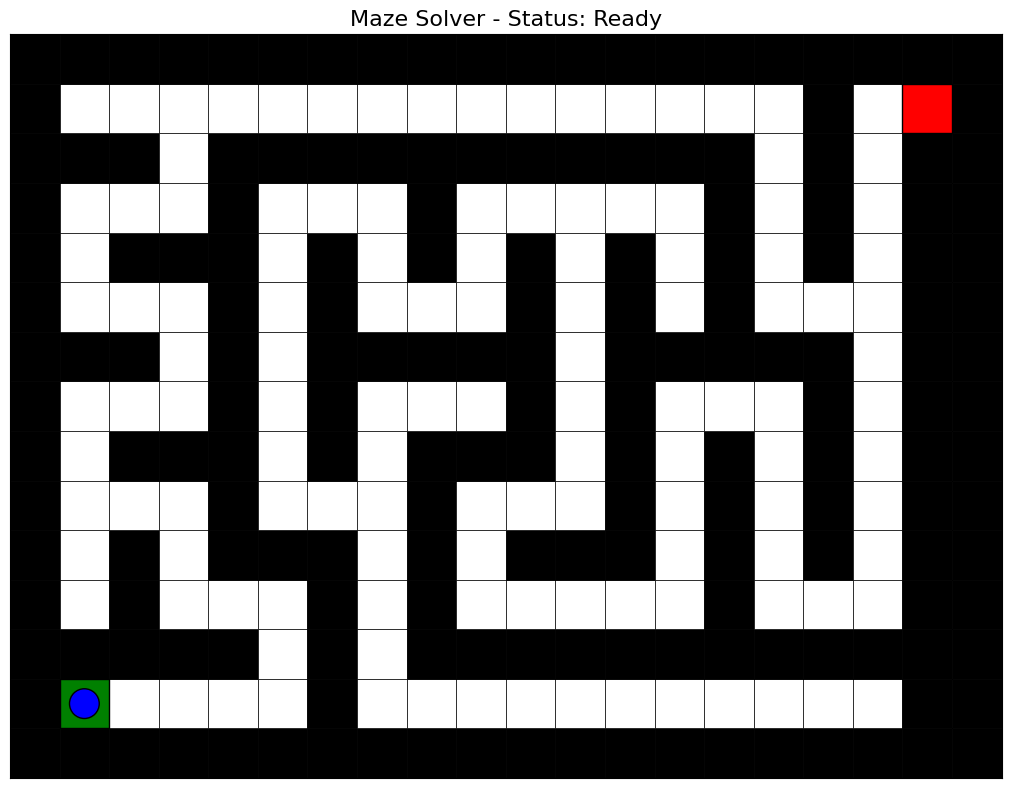

In [21]:
# Install required packages
!pip install ipywidgets matplotlib numpy

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets
from IPython.display import display, clear_output
import heapq
import random
import threading
import time

class Maze:
    """Generates and manages a maze grid using recursive backtracking."""
    def __init__(self, width, height):
        self.width = width
        self.height = height
        # Initialize grid with walls (1)
        self.grid = np.ones((height, width), dtype=int)
        self.start = (1, 1)
        self.goal = (width - 2, height - 2)
        self.generate_maze()

    def generate_maze(self):
        """Generates a maze using recursive backtracking."""
        stack = [self.start]
        self.grid[self.start[1], self.start[0]] = 0

        directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]

        while stack:
            current = stack[-1]
            x, y = current

            neighbors = []
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 < nx < self.width - 1 and 0 < ny < self.height - 1 and self.grid[ny, nx] == 1:
                    neighbors.append((nx, ny, dx, dy))

            if neighbors:
                nx, ny, dx, dy = random.choice(neighbors)
                self.grid[ny, nx] = 0
                self.grid[y + dy // 2, x + dx // 2] = 0
                stack.append((nx, ny))
            else:
                stack.pop()

        self.grid[self.start[1], self.start[0]] = 0
        self.grid[self.goal[1], self.goal[0]] = 0

    def is_valid_position(self, x, y):
        """Checks if a position is within bounds and is a path."""
        return 0 <= x < self.width and 0 <= y < self.height and self.grid[y, x] == 0

    def get_neighbors(self, x, y):
        """Returns valid neighbors for a given position."""
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if self.is_valid_position(nx, ny):
                neighbors.append((nx, ny))
        return neighbors

class MazeSolverAgent:
    """Implements a goal-based agent using A* search."""
    def __init__(self, maze):
        self.maze = maze
        self.position = maze.start
        self.solution = []
        self.solving = False
        self.moving = False
        self.path_index = 0
        self.explored = set()

    def heuristic(self, a, b):
        """Manhattan distance heuristic."""
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def solve(self):
        """A* search algorithm to find the optimal path."""
        self.solving = True
        self.explored = set()
        frontier = []
        heapq.heappush(frontier, (0, self.position, [self.position]))

        while frontier:
            _, current, path = heapq.heappop(frontier)

            if current in self.explored:
                continue

            self.explored.add(current)

            if current == self.maze.goal:
                self.solution = path
                self.solving = False
                return True

            for neighbor in self.maze.get_neighbors(current[0], current[1]):
                if neighbor not in self.explored:
                    new_path = path + [neighbor]
                    priority = len(new_path) + self.heuristic(neighbor, self.maze.goal)
                    heapq.heappush(frontier, (priority, neighbor, new_path))

        self.solving = False
        return False

    def start_moving(self):
        """Initializes agent movement along the solved path."""
        if self.solution:
            self.moving = True
            self.path_index = 0
            self.position = self.solution[0]

    def move(self):
        """Moves the agent one step along the path."""
        if self.moving and self.path_index < len(self.solution) - 1:
            self.path_index += 1
            self.position = self.solution[self.path_index]
            return True
        elif self.path_index >= len(self.solution) - 1:
            self.moving = False
            return False
        return False

    def reset(self):
        """Resets the agent's state."""
        self.position = self.maze.start
        self.solution = []
        self.solving = False
        self.moving = False
        self.path_index = 0
        self.explored = set()

class MazeSolverGUI:
    """Manages the GUI and game loop for the maze solver."""
    def __init__(self):
        self.maze = Maze(20, 15)
        self.agent = MazeSolverAgent(self.maze)
        self.show_explored = True
        self.show_solution = True
        self.animation_speed = 0.1  # seconds between moves
        self.fig, self.ax = plt.subplots(figsize=(10, 8), constrained_layout=True)
        self.output = widgets.Output()
        self.animation_timer = None

    def draw_maze(self):
        """Renders the maze and agent on the matplotlib figure."""
        self.ax.clear()

        # Draw maze grid
        for y in range(self.maze.height):
            for x in range(self.maze.width):
                if self.maze.grid[y, x] == 1:
                    facecolor = 'black'
                else:
                    facecolor = 'white'
                rect = patches.Rectangle((x, y), 1, 1, linewidth=0.5, edgecolor='black', facecolor=facecolor)
                self.ax.add_patch(rect)

        # Draw explored cells
        if self.show_explored and not self.agent.moving:
            for pos in self.agent.explored:
                if pos != self.maze.start and pos != self.maze.goal:
                    rect = patches.Rectangle((pos[0], pos[1]), 1, 1, facecolor='lavender', alpha=0.5)
                    self.ax.add_patch(rect)

        # Draw solution path
        if self.show_solution and self.agent.solution:
            if not self.agent.moving:
                for i in range(len(self.agent.solution) - 1):
                    start = self.agent.solution[i]
                    end = self.agent.solution[i + 1]
                    self.ax.plot([start[0] + 0.5, end[0] + 0.5], [start[1] + 0.5, end[1] + 0.5], 'y-', linewidth=3, solid_capstyle='round')

        # Draw animated path
        if self.agent.moving:
            for i in range(self.agent.path_index):
                start = self.agent.solution[i]
                end = self.agent.solution[i + 1]
                self.ax.plot([start[0] + 0.5, end[0] + 0.5], [start[1] + 0.5, end[1] + 0.5], 'c-', linewidth=3, solid_capstyle='round')

        # Draw start position
        start_rect = patches.Rectangle((self.maze.start[0], self.maze.start[1]), 1, 1, facecolor='green', edgecolor='black')
        self.ax.add_patch(start_rect)

        # Draw goal position
        goal_rect = patches.Rectangle((self.maze.goal[0], self.maze.goal[1]), 1, 1, facecolor='red', edgecolor='black')
        self.ax.add_patch(goal_rect)

        # Draw agent
        agent_circle = patches.Circle((self.agent.position[0] + 0.5, self.agent.position[1] + 0.5), 0.3, facecolor='blue', edgecolor='black')
        self.ax.add_patch(agent_circle)

        # Set axis limits and appearance
        self.ax.set_xlim(0, self.maze.width)
        self.ax.set_ylim(0, self.maze.height)
        self.ax.set_aspect('equal')
        self.ax.set_xticks([])
        self.ax.set_yticks([])

        # Set title
        status = "Ready"
        if self.agent.solving: status = "Solving..."
        elif self.agent.moving: status = "Moving"
        elif self.agent.solution: status = "Solved"

        self.ax.set_title(f"Maze Solver - Status: {status}", fontsize=16)

        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

    def create_widgets(self):
        """Creates and links the interactive widgets."""
        generate_button = widgets.Button(description="Generate New Maze")
        solve_button = widgets.Button(description="Solve Maze (A*)")
        move_button = widgets.Button(description="Animate Solution")
        reset_button = widgets.Button(description="Reset Agent")

        explored_toggle = widgets.Checkbox(value=self.show_explored, description="Show Explored Cells")
        solution_toggle = widgets.Checkbox(value=self.show_solution, description="Show Solution Path")

        speed_slider = widgets.FloatSlider(
            value=self.animation_speed, min=0.05, max=1.0, step=0.05, description="Animation Speed (s):"
        )

        generate_button.on_click(self.on_generate_click)
        solve_button.on_click(self.on_solve_click)
        move_button.on_click(self.on_move_click)
        reset_button.on_click(self.on_reset_click)
        explored_toggle.observe(self.on_explored_toggle, names='value')
        solution_toggle.observe(self.on_solution_toggle, names='value')
        speed_slider.observe(self.on_speed_change, names='value')

        control_panel = widgets.VBox([
            widgets.HBox([generate_button, solve_button]),
            widgets.HBox([move_button, reset_button]),
            widgets.HBox([explored_toggle, solution_toggle]),
            speed_slider
        ])

        return control_panel

    def on_generate_click(self, b):
        """Callback for the 'Generate New Maze' button."""
        with self.output:
            clear_output(wait=True)
            if self.animation_timer: self.animation_timer.cancel()
            self.maze = Maze(20, 15)
            self.agent = MazeSolverAgent(self.maze)
            self.draw_maze()

    def on_solve_click(self, b):
        """Callback for the 'Solve Maze' button."""
        with self.output:
            clear_output(wait=True)
            if self.animation_timer: self.animation_timer.cancel()
            self.agent.reset()
            self.draw_maze()
            self.agent.solve()
            self.draw_maze()

    def on_move_click(self, b):
        """Callback for the 'Animate Solution' button."""
        with self.output:
            if not self.agent.solution:
                print("Please solve the maze first.")
                return
            self.agent.start_moving()
            self.animate_movement()

    def on_reset_click(self, b):
        """Callback for the 'Reset Agent' button."""
        with self.output:
            if self.animation_timer: self.animation_timer.cancel()
            self.agent.reset()
            self.draw_maze()

    def on_explored_toggle(self, change):
        """Callback for the 'Show Explored Cells' checkbox."""
        self.show_explored = change.new
        with self.output: self.draw_maze()

    def on_solution_toggle(self, change):
        """Callback for the 'Show Solution Path' checkbox."""
        self.show_solution = change.new
        with self.output: self.draw_maze()

    def on_speed_change(self, change):
        """Callback for the animation speed slider."""
        self.animation_speed = change.new

    def animate_movement(self):
        """Animates the agent's movement along the solution path."""
        if self.agent.move():
            with self.output: self.draw_maze()
            self.animation_timer = threading.Timer(self.animation_speed, self.animate_movement)
            self.animation_timer.start()
        else:
            with self.output: self.draw_maze()

    def run(self):
        """Main entry point to display the GUI."""
        control_panel = self.create_widgets()
        display(control_panel, self.output)
        with self.output: self.draw_maze()

# Main entry point for Google Colab
if __name__ == "__main__":
    gui = MazeSolverGUI()
    gui.run()
